In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
import warnings
warnings.filterwarnings("ignore",category=FutureWarning)
warnings.filterwarnings("ignore")

In [3]:
train = pd.read_csv(r'D:\AI\libraries of AI\EDA\Assignments\HR_Analytics\train.csv')

In [4]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [5]:
train.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [38]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             54808 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  54808 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
 14  region 2              54808 non-null  int32  
dtypes: float64(1), int3

In [34]:
train['region 2'] = train['region'].str.split('_').str[1]
train['region 2']

0         7
1        22
2        19
3        23
4        26
         ..
54803    14
54804    27
54805     1
54806     9
54807    22
Name: region 2, Length: 54808, dtype: object

In [37]:
train['region 2']= train['region 2'].astype(int)

In [7]:
train.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [8]:
train["education"].mode()

0    Bachelor's
dtype: object

In [9]:
train["education"].fillna(train["education"].mode()[0],inplace = True)

In [10]:
train.isnull().sum()

employee_id                0
department                 0
region                     0
education                  0
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [11]:
train['previous_year_rating']

0        5.0
1        5.0
2        3.0
3        1.0
4        3.0
        ... 
54803    3.0
54804    2.0
54805    5.0
54806    1.0
54807    1.0
Name: previous_year_rating, Length: 54808, dtype: float64

In [12]:
TrainNullvaluePer = train.apply(lambda x : np.round(100*x.isnull().sum()/train.shape[0],2))
TrainNullvalueCnt = train.isnull().sum()
TrainNullDF = pd.DataFrame([TrainNullvalueCnt,TrainNullvaluePer]).T
TrainNullDF.columns=["Nullvaluecount","Nullvalueper"]
TrainNullDF.sort_values(by ="Nullvaluecount",ascending = False,inplace= True)
TrainNullDF.reset_index(inplace = True)
TrainNullDF.head(20)

,index,Nullvaluecount,Nullvalueper
0,previous_year_rating,4124.0,7.52
1,employee_id,0.0,0.00
2,department,0.0,0.00
3,region,0.0,0.00
4,education,0.0,0.00
5,gender,0.0,0.00
6,recruitment_channel,0.0,0.00
7,no_of_trainings,0.0,0.00
8,age,0.0,0.00
9,length_of_service,0.0,0.00


In [13]:
train["previous_year_rating"].nunique()

5

In [14]:
train["previous_year_rating"].fillna(train["previous_year_rating"].mode()[0],inplace=True)

In [15]:
TrainNullvaluePer = train.apply(lambda x : np.round(100*x.isnull().sum()/train.shape[0],2))
TrainNullvalueCnt = train.isnull().sum()
TrainNullDF = pd.DataFrame([TrainNullvalueCnt,TrainNullvaluePer]).T
TrainNullDF.columns=["Nullvaluecount","Nullvalueper"]
TrainNullDF.sort_values(by ="Nullvaluecount",ascending = False,inplace= True)
TrainNullDF.reset_index(inplace = True)
TrainNullDF.head(20)

,index,Nullvaluecount,Nullvalueper
0,employee_id,0.0,0.0
1,department,0.0,0.0
2,region,0.0,0.0
3,education,0.0,0.0
4,gender,0.0,0.0
5,recruitment_channel,0.0,0.0
6,no_of_trainings,0.0,0.0
7,age,0.0,0.0
8,previous_year_rating,0.0,0.0
9,length_of_service,0.0,0.0


In [16]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             54808 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  54808 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [18]:
columns = train.columns
train['region']

0         region_7
1        region_22
2        region_19
3        region_23
4        region_26
           ...    
54803    region_14
54804    region_27
54805     region_1
54806     region_9
54807    region_22
Name: region, Length: 54808, dtype: object

<AxesSubplot:xlabel='age'>

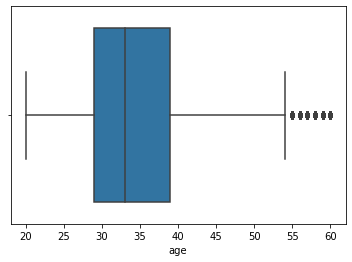

In [19]:
sns.boxplot("age",data=train)

In [20]:
objectColumns = train.select_dtypes(include = np.object).columns

In [21]:
objectColumns

Index(['department', 'region', 'education', 'gender', 'recruitment_channel'], dtype='object')

In [22]:
trainObjectDF = train[objectColumns]

In [23]:
trainObjectDF

,department,region,education,gender,recruitment_channel
0,Sales & Marketing,region_7,Master's & above,f,sourcing
1,Operations,region_22,Bachelor's,m,other
2,Sales & Marketing,region_19,Bachelor's,m,sourcing
3,Sales & Marketing,region_23,Bachelor's,m,other
4,Technology,region_26,Bachelor's,m,other
...,...,...,...,...,...
54803,Technology,region_14,Bachelor's,m,sourcing
54804,Operations,region_27,Master's & above,f,other
54805,Analytics,region_1,Bachelor's,m,other
54806,Sales & Marketing,region_9,Bachelor's,m,sourcing


In [24]:
NumericalColumns = train.select_dtypes(include=np.number).columns

In [25]:
NumericalColumns

Index(['employee_id', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [26]:
descreteCols = []
continousCols = []
for cols in NumericalColumns:
    if train[cols].nunique() < 20:
        descreteCols.append(cols)
    else:
        continousCols.append(cols)   

In [27]:
descreteCols

['no_of_trainings',
 'previous_year_rating',
 'KPIs_met >80%',
 'awards_won?',
 'is_promoted']

In [28]:
continousCols

['employee_id', 'age', 'length_of_service', 'avg_training_score']

ValueError: `bins` must increase monotonically, when an array

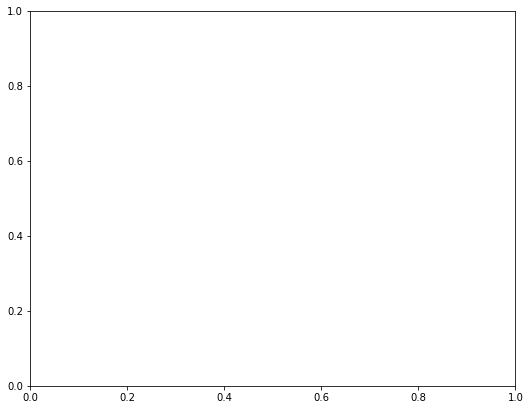

In [29]:
j = 0 
plt.figure(figsize=(40,40))
for columns in continousCols:
    plt.subplot(5,4,j+1)
    plt.hist(train[columns],train["is_promoted"])
    plt.xlabel(columns)
    plt.ylabel('is_promoted')
    j+=1

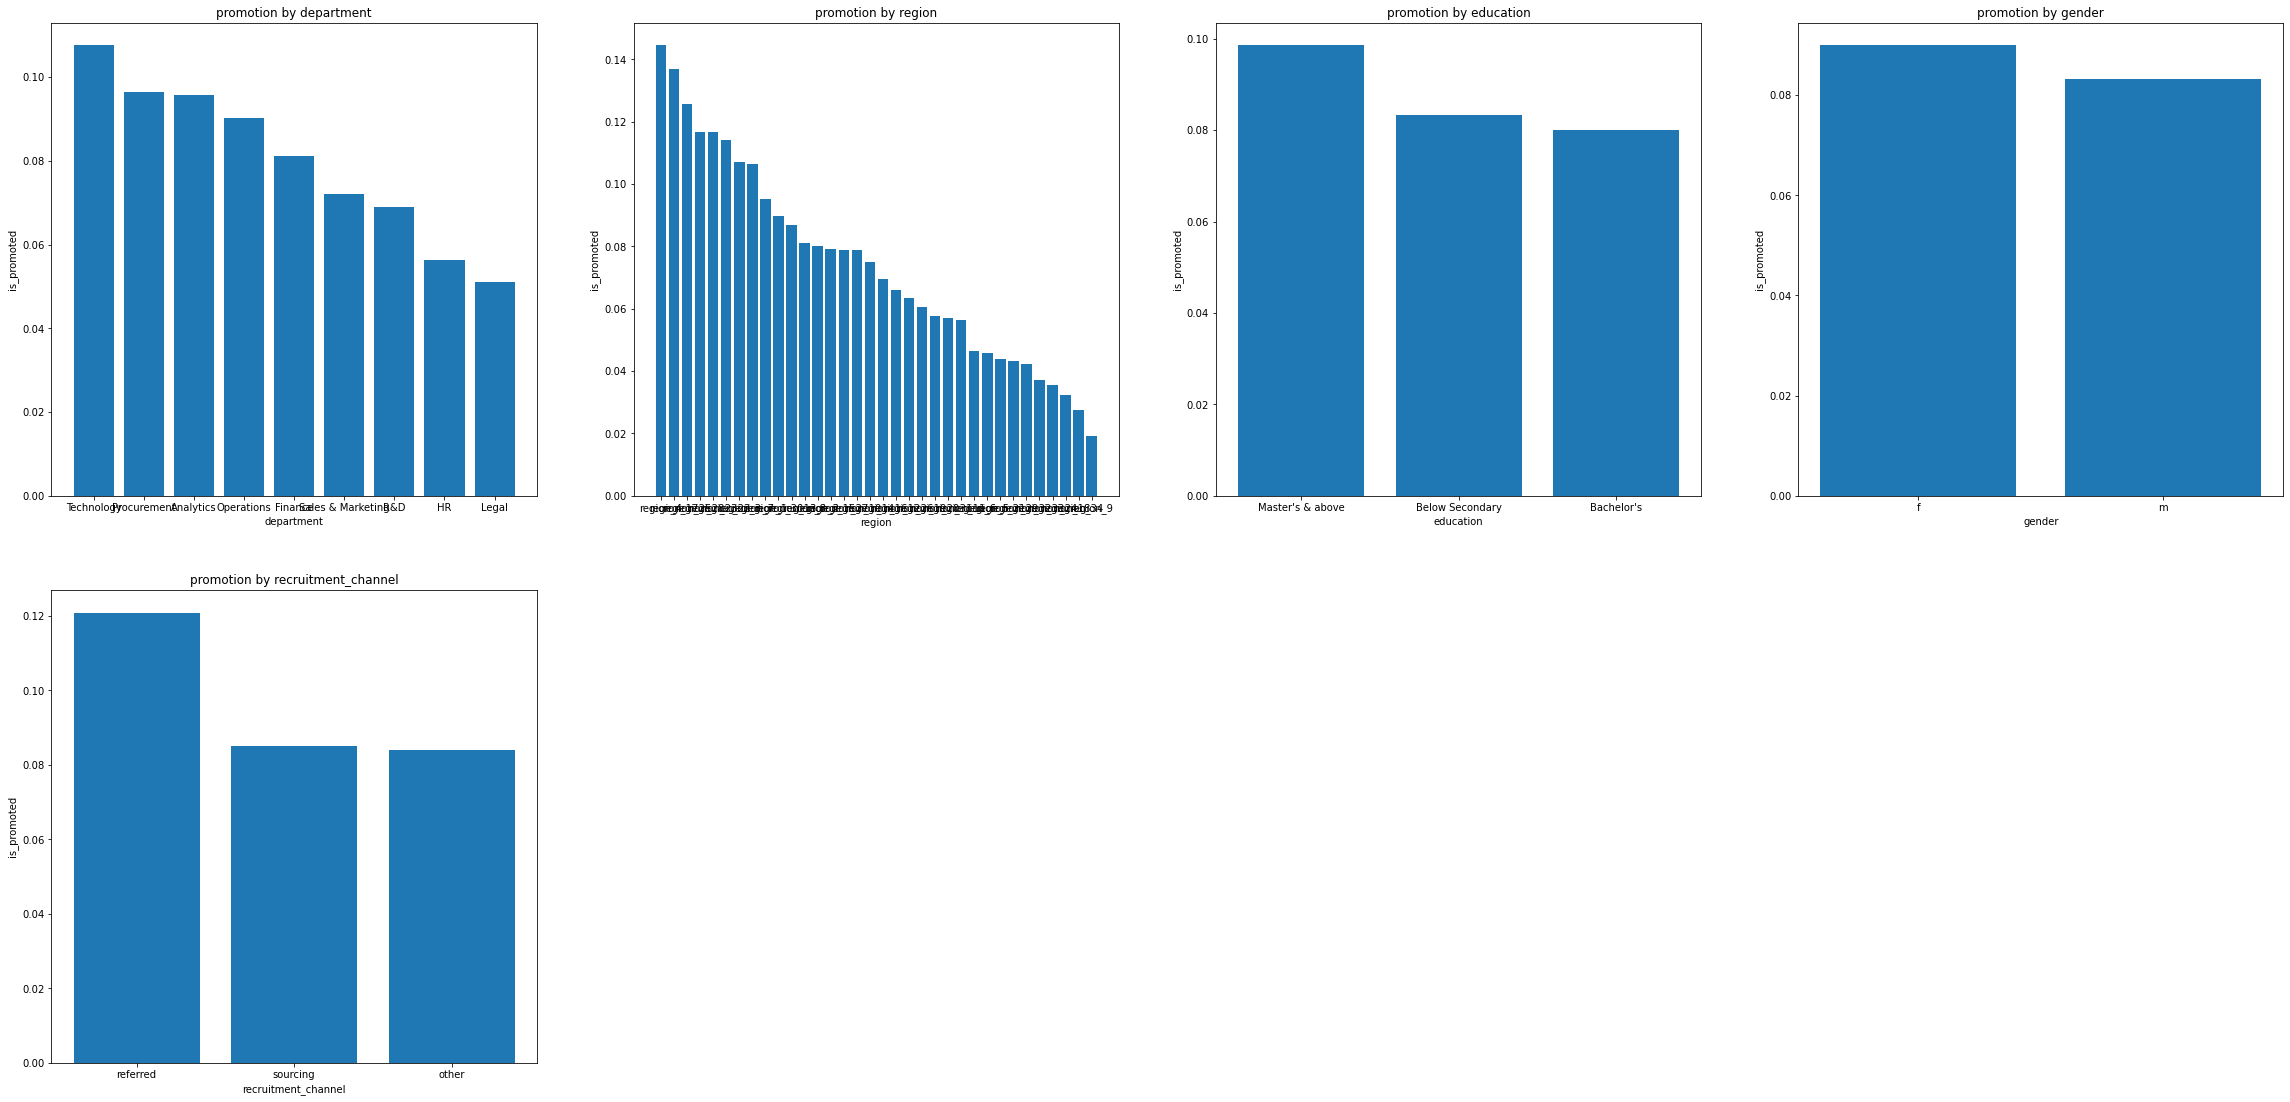

In [ ]:
j = 0
plt.figure(figsize=(40,40))
for cols in objectColumns:
    plt.subplot(4,4,j+1)
    observationalval = train.groupby(cols)['is_promoted'].mean()
    observationalDF = pd.DataFrame(observationalval).sort_values(by = 'is_promoted',ascending=False )
    observationalDF.reset_index(inplace=True)
    plt.bar(observationalDF[cols],observationalDF['is_promoted'])
    plt.title(f"promotion by {cols}")
    plt.xlabel(cols)
    plt.ylabel("is_promoted")
    j+=1

In [ ]:
observationalDF

,recruitment_channel,is_promoted
0,referred,0.120841
1,sourcing,0.085013
2,other,0.083952


In [ ]:
observationalval

recruitment_channel
other       0.083952
referred    0.120841
sourcing    0.085013
Name: is_promoted, dtype: float64

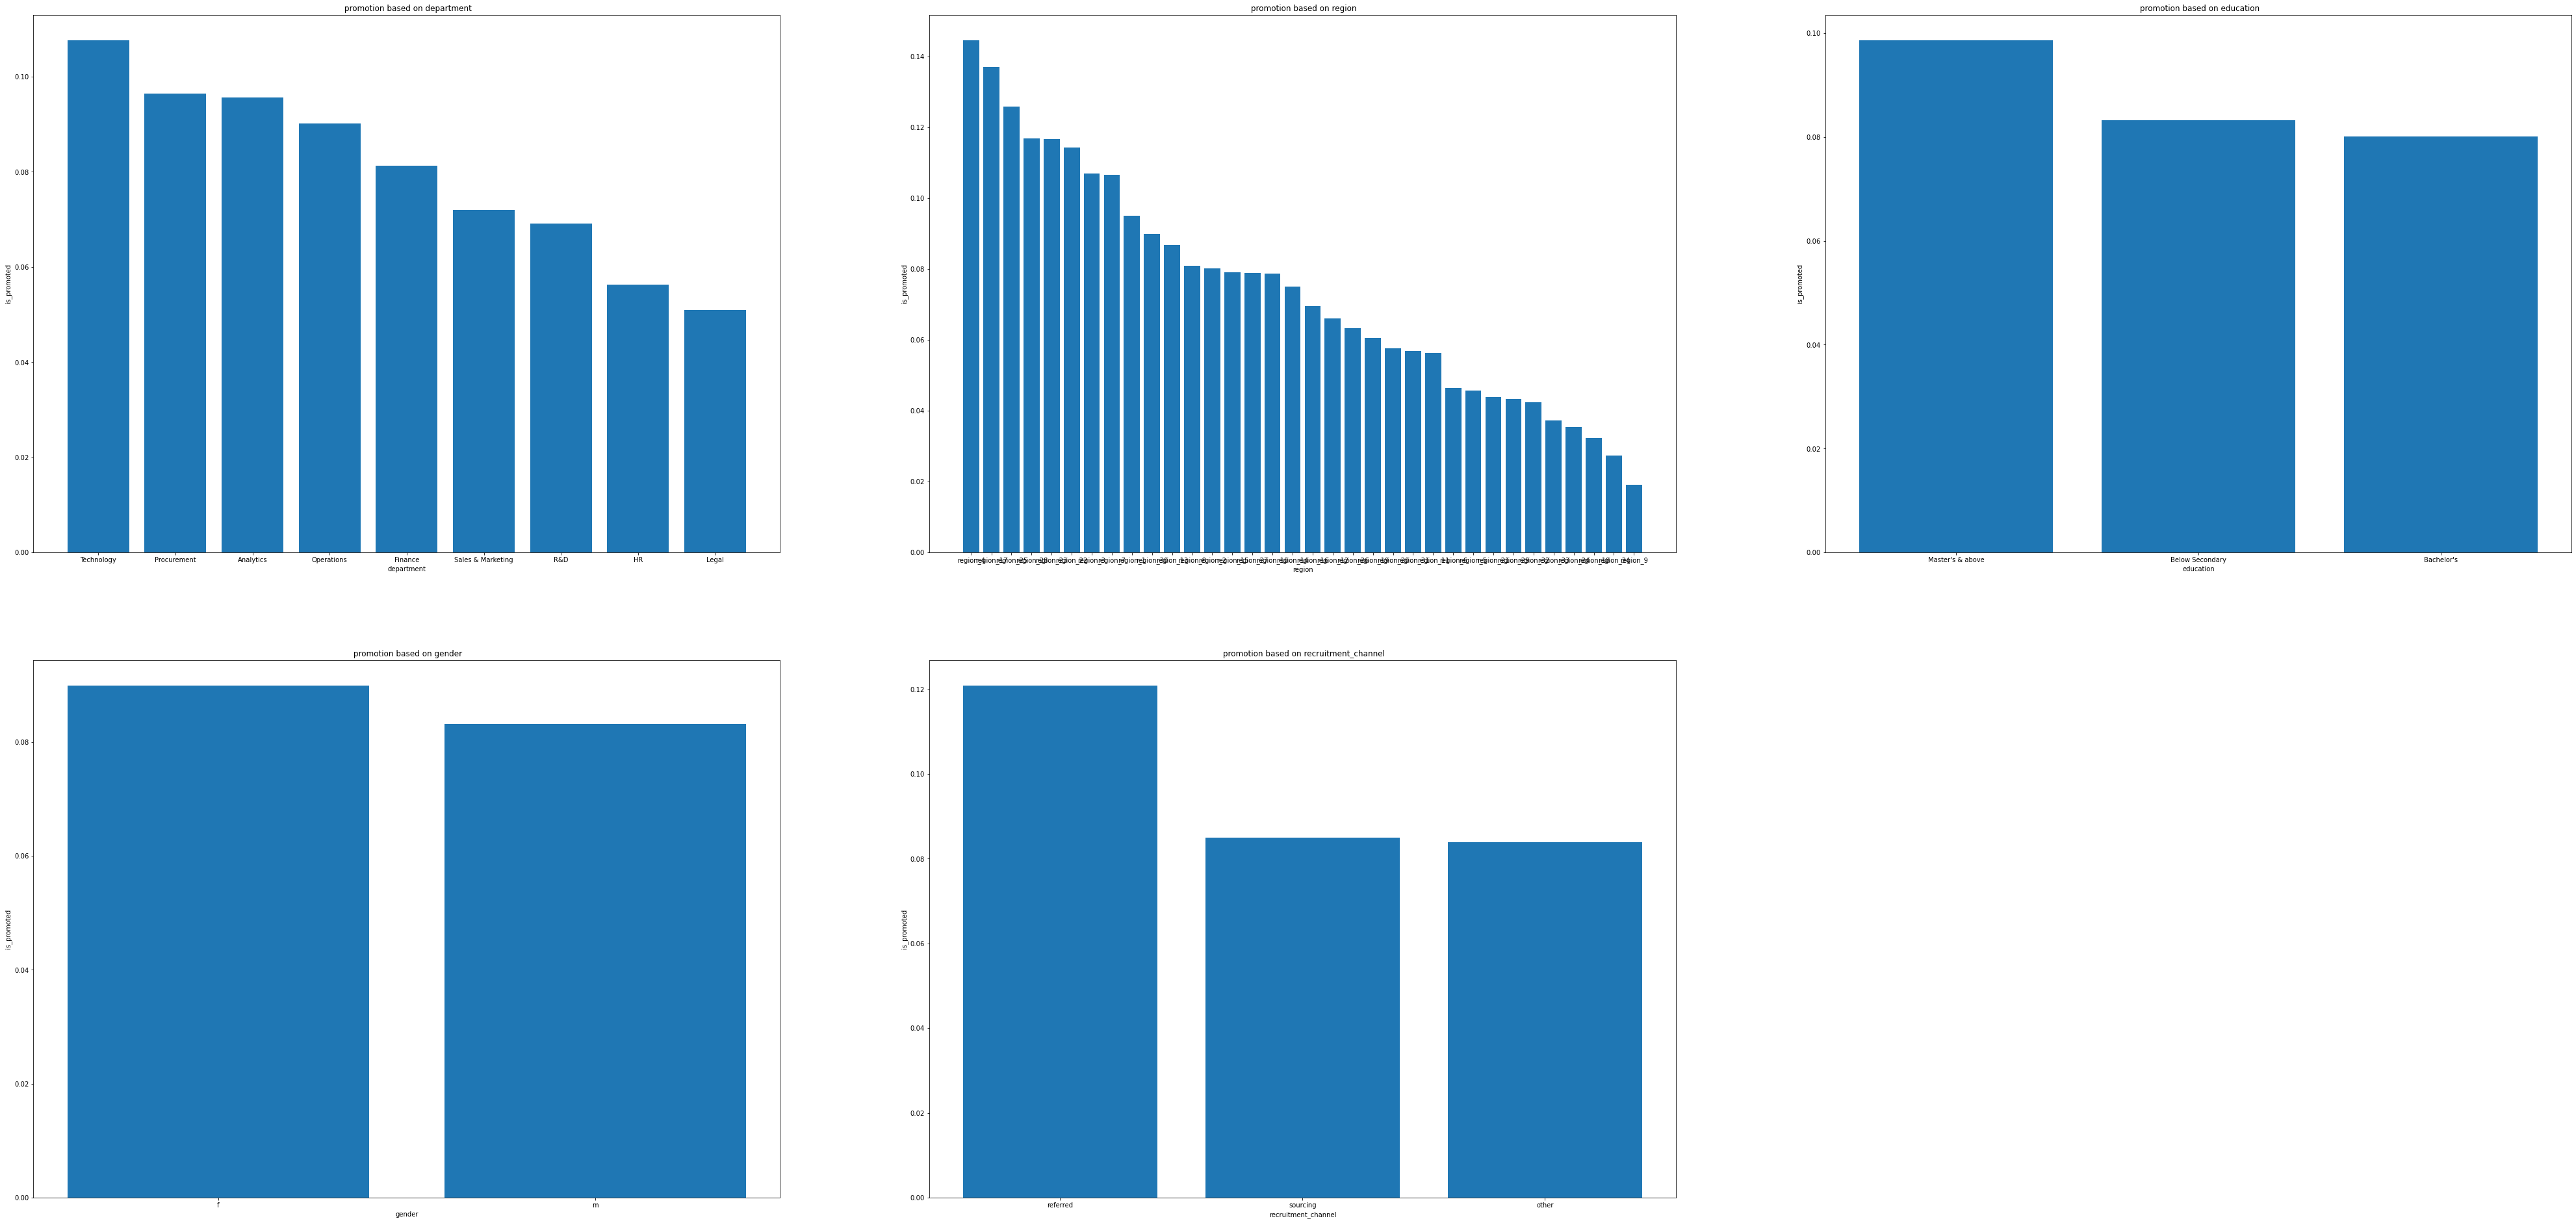

In [ ]:
j = 0 
plt.figure(figsize=[70,70])
for cols in objectColumns:
    plt.subplot(4,3,j+1)
    observationalval1 = train.groupby(cols)["is_promoted"].mean()
    observationalDF1 = pd.DataFrame(observationalval1).sort_values(by = "is_promoted",ascending=False)
    observationalDF1.reset_index(inplace=True)
    plt.bar(observationalDF1[cols],observationalDF1['is_promoted'])
    plt.title(f" promotion based on {cols}")
    plt.xlabel(cols)
    plt.ylabel("is_promoted")
    j+=1

### Handling Outliers

In [ ]:
continousCols

['employee_id', 'age', 'length_of_service', 'avg_training_score']

In [ ]:
train.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.304481,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.214770,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [ ]:
for columns in continousCols:
    upper_lim = train[columns].mean()+train[columns].std()*3
    lower_lim = train[columns].mean()-train[columns].std()*3

    train.loc[(train[columns] > upper_lim),columns] = upper_lim
    train.loc[(train[columns] < lower_lim),columns] = lower_lim
    



In [ ]:
from collections import defaultdict
defaultEncoder = defaultdict(LabelEncoder)

# variable encoding 
fittrainObjectDF = trainObjectDF.apply(lambda x: defaultEncoder[x.name].fit_transform(x))

In [ ]:
fittrainObjectDF

,department,region,education,gender,recruitment_channel
0,7,31,2,0,2
1,4,14,0,1,0
2,7,10,0,1,2
3,7,15,0,1,0
4,8,18,0,1,0
...,...,...,...,...,...
54803,8,5,0,1,2
54804,4,19,2,0,0
54805,0,0,0,1,0
54806,7,33,0,1,2


In [ ]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438.0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35.0,5.0,8.0,1,0,49.0,0
1,65141.0,Operations,region_22,Bachelor's,m,other,1,30.0,5.0,4.0,0,0,60.0,0
2,7513.0,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34.0,3.0,7.0,0,0,50.0,0
3,2542.0,Sales & Marketing,region_23,Bachelor's,m,other,2,39.0,1.0,10.0,0,0,50.0,0
4,48945.0,Technology,region_26,Bachelor's,m,other,1,45.0,3.0,2.0,0,0,73.0,0


In [ ]:
fittrainObjectDF.head()

,department,region,education,gender,recruitment_channel
0,7,31,2,0,2
1,4,14,0,1,0
2,7,10,0,1,2
3,7,15,0,1,0
4,8,18,0,1,0


In [ ]:

train.shape

(54808, 14)

In [ ]:
copyTrain = train.copy()

In [ ]:
copyTrain.drop(objectColumns,axis=1,inplace=True)

In [ ]:
updatedtrainDf = pd.concat([copyTrain,fittrainObjectDF],axis=1)


In [ ]:
import scipy.stats as stat 
import pylab


In [ ]:
updatedtrainDf

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,department,region,education,gender,recruitment_channel
0,65438.0,1,35.0,5.0,8.0,1,0,49.0,0,7,31,2,0,2
1,65141.0,1,30.0,5.0,4.0,0,0,60.0,0,4,14,0,1,0
2,7513.0,1,34.0,3.0,7.0,0,0,50.0,0,7,10,0,1,2
3,2542.0,2,39.0,1.0,10.0,0,0,50.0,0,7,15,0,1,0
4,48945.0,1,45.0,3.0,2.0,0,0,73.0,0,8,18,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030.0,1,48.0,3.0,17.0,0,0,78.0,0,8,5,0,1,2
54804,74592.0,1,37.0,2.0,6.0,0,0,56.0,0,4,19,2,0,0
54805,13918.0,1,27.0,5.0,3.0,1,0,79.0,0,0,0,0,1,0
54806,13614.0,1,29.0,1.0,2.0,0,0,45.0,0,7,33,0,1,2


In [ ]:
import scipy.stats as stat
import pylab

In [ ]:
updatedtrainDf['KPIs_met >80%'].head(50)

0     1
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     1
10    0
11    1
12    1
13    0
14    0
15    0
16    1
17    0
18    1
19    0
20    0
21    0
22    0
23    0
24    0
25    1
26    1
27    0
28    1
29    0
30    1
31    0
32    0
33    0
34    1
35    1
36    1
37    0
38    1
39    1
40    0
41    1
42    1
43    0
44    0
45    0
46    0
47    0
48    1
49    0
Name: KPIs_met >80%, dtype: int64

In [ ]:
def plot_data(updatedtrainDf,feature):
    plt.figure(figsize = (10,6))
    plt.subplot(1,2,1)
    updatedtrainDf[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(updatedtrainDf[feature],dist='norm',plot = pylab)
    plt.show()

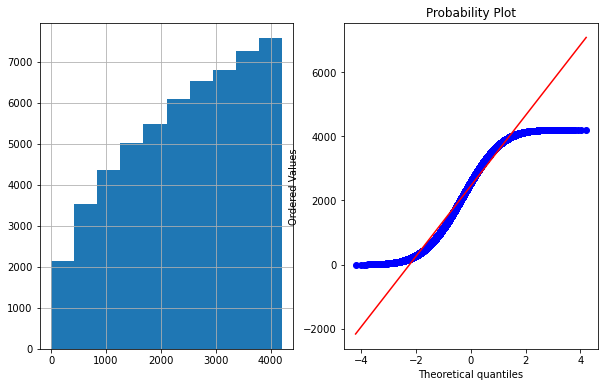

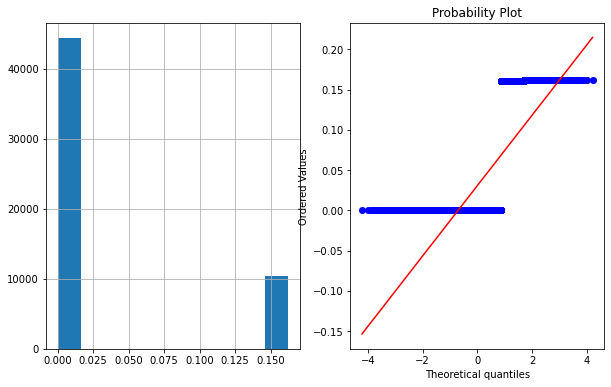

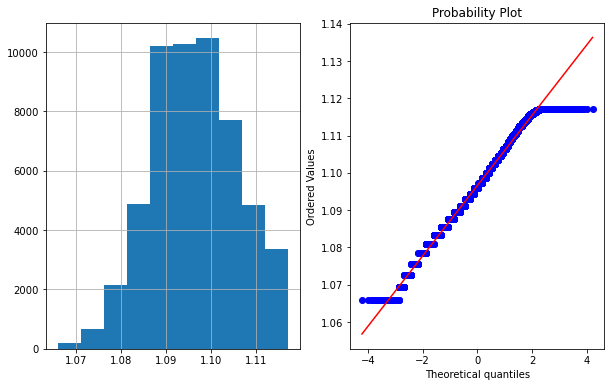

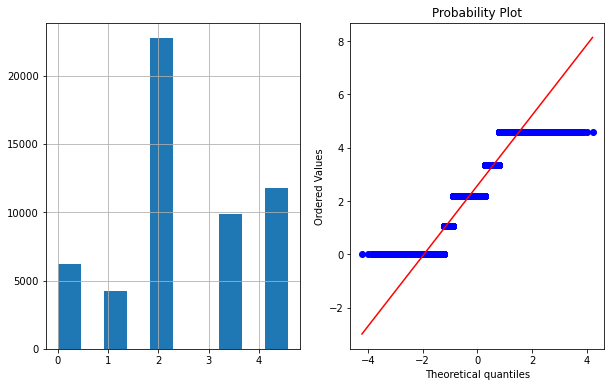

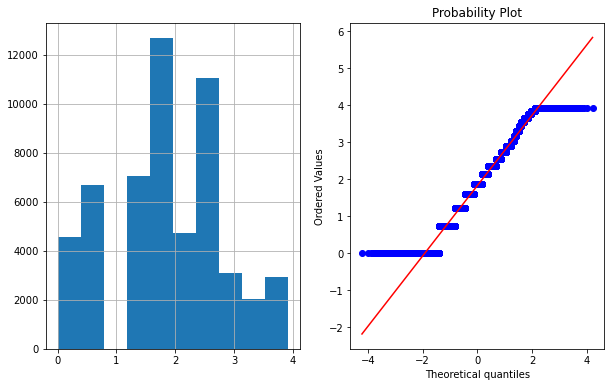

ValueError: Data must be positive.

In [ ]:
for i in updatedtrainDf:
    updatedtrainDf[i],parameters = stat.boxcox(updatedtrainDf[i])
    plot_data(updatedtrainDf,i)
    

In [ ]:
updatedtrainDf.dtypes

employee_id             float64
no_of_trainings           int64
age                     float64
previous_year_rating    float64
length_of_service       float64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score      float64
is_promoted               int64
department                int32
region                    int32
education                 int32
gender                    int32
recruitment_channel       int32
dtype: object

In [ ]:
corrDF = updatedtrainDf.corr()

In [ ]:
corrDF.sum()

employee_id             1.004742
no_of_trainings         0.807788
age                     1.808853
previous_year_rating    1.450948
length_of_service       1.677341
KPIs_met >80%           1.460398
awards_won?             1.337621
avg_training_score      1.135168
is_promoted             1.730699
department              0.668149
region                  0.859069
education               1.654307
gender                  0.916960
recruitment_channel     0.988488
dtype: float64

In [ ]:
corrColumns = abs(corrDF['is_promoted']).sort_values(ascending=False)
corrColumns


is_promoted             1.000000
KPIs_met >80%           0.221582
awards_won?             0.195871
avg_training_score      0.181147
previous_year_rating    0.153230
education               0.029257
no_of_trainings         0.024896
age                     0.017169
gender                  0.011109
length_of_service       0.009620
region                  0.008841
recruitment_channel     0.002229
employee_id             0.001206
department              0.000130
Name: is_promoted, dtype: float64

In [ ]:
finalColumns = corrColumns[corrColumns>0.04].index

In [ ]:
finalColumns

Index(['is_promoted', 'KPIs_met >80%', 'awards_won?', 'avg_training_score',
       'previous_year_rating'],
      dtype='object')

In [ ]:
train['is_promoted'].unique()

array([0, 1], dtype=int64)

In [ ]:
corrDF

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,department,region,education,gender,recruitment_channel
employee_id,1.000000,-0.005121,0.000339,0.004209,0.000845,-0.002501,0.008420,-0.000586,0.001206,-0.005187,-0.003423,0.002124,-0.001542,0.005960
no_of_trainings,-0.005121,1.000000,-0.081588,-0.061564,-0.058545,-0.045576,-0.007628,0.042517,-0.024896,0.014152,-0.004590,-0.033469,0.084501,-0.010405
age,0.000339,-0.081588,1.000000,0.026935,0.657771,-0.025442,-0.008218,-0.048487,-0.017169,0.079455,-0.088613,0.341079,-0.015905,-0.011305
previous_year_rating,0.004209,-0.061564,0.026935,1.000000,0.024697,0.337367,0.026587,0.071926,0.153230,-0.135561,-0.005977,0.027393,-0.024024,0.005731
length_of_service,0.000845,-0.058545,0.657771,0.024697,1.000000,-0.078976,-0.040167,-0.039700,-0.009620,0.059675,-0.057787,0.240729,-0.019269,-0.002313
KPIs_met >80%,-0.002501,-0.045576,-0.025442,0.337367,-0.078976,1.000000,0.097000,0.078391,0.221582,-0.088209,-0.007664,0.012123,-0.037400,-0.000297
awards_won?,0.008420,-0.007628,-0.008218,0.026587,-0.040167,0.097000,1.000000,0.072138,0.195871,-0.002151,0.000307,-0.001409,0.002381,-0.005510
avg_training_score,-0.000586,0.042517,-0.048487,0.071926,-0.039700,0.078391,0.072138,1.000000,0.181147,-0.251626,0.023572,0.032787,-0.024494,-0.002416
is_promoted,0.001206,-0.024896,-0.017169,0.153230,-0.009620,0.221582,0.195871,0.181147,1.000000,0.000130,0.008841,0.029257,-0.011109,0.002229
department,-0.005187,0.014152,0.079455,-0.135561,0.059675,-0.088209,-0.002151,-0.251626,0.000130,1.000000,-0.020592,0.043441,-0.030108,0.004732


In [ ]:

corrDF2 = pd.DataFrame(corrDF)
corrDF2.reset_index(inplace=True)
corrDF2

,index,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,department,region,education,gender,recruitment_channel
0,employee_id,1.000000,-0.005121,0.000339,0.004209,0.000845,-0.002501,0.008420,-0.000586,0.001206,-0.005187,-0.003423,0.002124,-0.001542,0.005960
1,no_of_trainings,-0.005121,1.000000,-0.081588,-0.061564,-0.058545,-0.045576,-0.007628,0.042517,-0.024896,0.014152,-0.004590,-0.033469,0.084501,-0.010405
2,age,0.000339,-0.081588,1.000000,0.026935,0.657771,-0.025442,-0.008218,-0.048487,-0.017169,0.079455,-0.088613,0.341079,-0.015905,-0.011305
3,previous_year_rating,0.004209,-0.061564,0.026935,1.000000,0.024697,0.337367,0.026587,0.071926,0.153230,-0.135561,-0.005977,0.027393,-0.024024,0.005731
4,length_of_service,0.000845,-0.058545,0.657771,0.024697,1.000000,-0.078976,-0.040167,-0.039700,-0.009620,0.059675,-0.057787,0.240729,-0.019269,-0.002313
5,KPIs_met >80%,-0.002501,-0.045576,-0.025442,0.337367,-0.078976,1.000000,0.097000,0.078391,0.221582,-0.088209,-0.007664,0.012123,-0.037400,-0.000297
6,awards_won?,0.008420,-0.007628,-0.008218,0.026587,-0.040167,0.097000,1.000000,0.072138,0.195871,-0.002151,0.000307,-0.001409,0.002381,-0.005510
7,avg_training_score,-0.000586,0.042517,-0.048487,0.071926,-0.039700,0.078391,0.072138,1.000000,0.181147,-0.251626,0.023572,0.032787,-0.024494,-0.002416
8,is_promoted,0.001206,-0.024896,-0.017169,0.153230,-0.009620,0.221582,0.195871,0.181147,1.000000,0.000130,0.008841,0.029257,-0.011109,0.002229
9,department,-0.005187,0.014152,0.079455,-0.135561,0.059675,-0.088209,-0.002151,-0.251626,0.000130,1.000000,-0.020592,0.043441,-0.030108,0.004732


In [ ]:
updatedtrainDf 
y = updatedtrainDf['is_promoted']
X = updatedtrainDf.drop(["is_promoted"],axis=1)

In [ ]:
X

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,department,region,education,gender,recruitment_channel
0,65438.0,1,35.0,5.0,8.0,1,0,49.0,7,31,2,0,2
1,65141.0,1,30.0,5.0,4.0,0,0,60.0,4,14,0,1,0
2,7513.0,1,34.0,3.0,7.0,0,0,50.0,7,10,0,1,2
3,2542.0,2,39.0,1.0,10.0,0,0,50.0,7,15,0,1,0
4,48945.0,1,45.0,3.0,2.0,0,0,73.0,8,18,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030.0,1,48.0,3.0,17.0,0,0,78.0,8,5,0,1,2
54804,74592.0,1,37.0,2.0,6.0,0,0,56.0,4,19,2,0,0
54805,13918.0,1,27.0,5.0,3.0,1,0,79.0,0,0,0,1,0
54806,13614.0,1,29.0,1.0,2.0,0,0,45.0,7,33,0,1,2


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state=42) #0.67 data will be for training.

In [ ]:
sc_X = StandardScaler()
X_train = pd.DataFrame(sc_X.fit_transform(X_train),columns = X_train.columns)
X_test = pd.DataFrame(sc_X.transform(X_test),columns = X_test.columns)

sc_Y = StandardScaler()
y_train = pd.DataFrame(sc_Y.fit_transform(np.array(y_train).reshape(-1,1)))
y_test = pd.DataFrame(sc_Y.transform(np.array([y_test]).reshape(-1,1)))

In [ ]:
for i in X_train.columns:
    X_train[i],parameters = stat.boxcox(X_train[i])
    plot_data(X_train,i)

ValueError: Data must be positive.

In [ ]:
import statsmodels.api as sm
mod = sm.OLS(y_train,X_train)
FinalInfo = mod.fit()
FinalInfo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      0   R-squared (uncentered):                   0.116
Model:                            OLS   Adj. R-squared (uncentered):              0.116
Method:                 Least Squares   F-statistic:                              370.7
Date:                Thu, 02 Jun 2022   Prob (F-statistic):                        0.00
Time:                        10:03:11   Log-Likelihood:                         -49840.
No. Observations:               36721   AIC:                                  9.971e+04
Df Residuals:                   36708   BIC:                                  9.982e+04
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
employee_id             -0.0013      0.005     -0.268      0.789      -0.011       0.008
no_of_trainings         -0.0210      0.005     -4.230      0.000      -0.031      -0.011
age                     -0.0407      0.007     -5.989      0.000      -0.054      -0.027
previous_year_rating     0.0886      0.005     16.845      0.000       0.078       0.099
length_of_service        0.0312      0.007      4.754      0.000       0.018       0.044
KPIs_met >80%            0.1665      0.005     31.585      0.000       0.156       0.177
awards_won?              0.1705      0.005     34.473      0.000       0.161       0.180
avg_training_score       0.1667      0.005     32.560      0.000       0.157       0.177
department               0.0671      0.005     13.061      0.000       0.057       0.077
region                   0.0052      0.005      1.057      0.291      -0.004       0.015
education                0.0231      0.005      4.398      0.000       0.013       0.033
gender                   0.0108      0.005      2.192      0.028       0.001       0.021
recruitment_channel      0.0009      0.005      0.181      0.856      -0.009       0.011
==============================================================================
Omnibus:                    18045.202   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            85337.565
Skew:                           2.479   Prob(JB):                         0.00
Kurtosis:                       8.586   Cond. No.                         2.42
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
Final_sum = FinalInfo.summary2().tables[1]["P>|t|"]

In [ ]:
df =  Final_sum[Final_sum>=0.05].index
df

Index(['employee_id', 'region', 'recruitment_channel'], dtype='object')

In [ ]:
X_train.drop(X_train[df],axis= 1 ,inplace=True)

In [ ]:
X_train

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,department,education,gender
0,-0.417741,-0.756638,0.572047,-0.699049,-0.738621,-0.154860,-1.524395,0.809632,-0.626163,0.649043
1,1.212252,-0.232720,0.572047,-0.200044,-0.738621,-0.154860,1.620157,-1.986953,1.626208,0.649043
2,1.212252,-0.756638,-0.251465,0.797967,-0.738621,-0.154860,-1.000303,0.809632,1.626208,0.649043
3,1.212252,0.422177,-0.251465,0.298961,1.353873,6.457464,-0.251600,-0.388904,-0.626163,0.649043
4,-0.417741,0.160218,-0.251465,0.548464,-0.738621,-0.154860,-1.150043,0.809632,1.626208,-1.540731
...,...,...,...,...,...,...,...,...,...,...
36716,2.842245,0.160218,-0.251465,-0.449547,-0.738621,-0.154860,0.272492,0.010608,1.626208,-1.540731
36717,-0.417741,-1.018596,-0.251465,-1.198054,-0.738621,-0.154860,0.347363,0.010608,-0.626163,-1.540731
36718,-0.417741,-0.101741,1.395559,0.298961,1.353873,-0.154860,0.122752,-0.388904,-0.626163,-1.540731
36719,2.842245,0.029238,1.395559,-0.699049,-0.738621,-0.154860,1.695028,-1.986953,1.626208,0.649043
